In [36]:
class MeraRidge:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.b = None
        self.m = None
        
        
    def fit(self,X_train, y_train):
        den = 0
        num = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean()) * (X_train[i]-X_train.mean())
            den = den + (X_train[i]-X_train.mean())**2
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m * X_train.mean())
    def predict(self, X_test):
        return (self.m*X_test + self.b)

In [37]:
mrg = MeraRidge(alpha=10)

In [38]:
mrg.fit(X, y)
mrg.fit(X, y)
mrg.b, mrg.m

(array([-2.126913]), array([24.9546267]))

In [39]:
mrg = MeraRidge(alpha=100)
mrg.fit(X, y)
mrg.fit(X, y)
mrg.b, mrg.m

(array([-1.42484415]), array([12.93442104]))

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X, y)

LinearRegression()

In [24]:
lr.coef_, lr.intercept_

(array([27.82809103]), -2.29474455867698)

In [8]:
from sklearn.linear_model import Ridge

In [9]:
rg = Ridge(alpha=10)

In [10]:
rg.fit(X_train , y_train)

Ridge(alpha=10)

In [11]:
rg.coef_, rg.intercept_

(array([ 16.83224221,  -0.44029424,  68.05946226,  45.64645564,
         16.81998361,  10.73595036, -43.69414492,  43.52848942,
         63.34758984,  38.50408098]),
 151.6656621259749)

In [12]:
from sklearn.datasets import make_regression

In [13]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

In [14]:
rg = Ridge(alpha=10)

In [15]:
rg.fit(X, y)
rg.coef_, rg.intercept_

(array([24.9546267]), -2.1269130035235726)

In [16]:
rg1 = Ridge(alpha=100)
rg1.fit(X, y)
rg1.coef_, rg1.intercept_

(array([12.93442104]), -1.4248441496033308)

In [17]:
import matplotlib.pyplot as plt

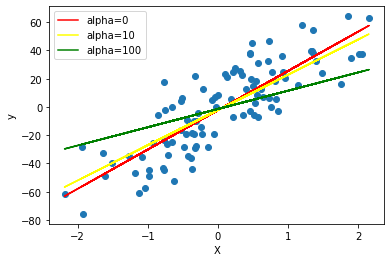

In [27]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel("y")
plt.plot(X, lr.predict(X), color = 'red', label = "alpha=0")
plt.plot(X, rg.predict(X), color = 'yellow', label = "alpha=10")
plt.plot(X, rg1.predict(X), color = 'green', label = "alpha=100")
plt.legend()

# Ridge Regularization For n-dimensional Data

In [40]:
from sklearn.datasets import load_diabetes

In [41]:
X, y = load_diabetes(return_X_y=True)

In [44]:
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [45]:
from sklearn.linear_model import Ridge

In [46]:
reg = Ridge(alpha=0.1, solver="cholesky")

In [47]:
reg.fit(X_train ,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [48]:
reg.intercept_, reg.coef_

(150.89050209333024,
 array([  44.02025512, -241.69666596,  452.98163524,  332.04993719,
         -76.34010147,  -68.52063199, -164.98817213,  149.9687712 ,
         431.61985919,   58.51762582]))

In [60]:
class MeraRidge:
    def __init__(self, alpha = 0.1):
        self.alpha = alpha
        self.coef_ = None
        self.itercept_ = None
        
    def fit(self, X_train, y_train):
        
        X_train = np.insert(X_train, 0, 1, axis = 1)
        I = np.identity(X_train.shape[1])
        result = np.linalg.inv(np.dot(X_train.T, X_train) + self.alpha*I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [61]:
mreg = MeraRidge()

In [62]:
mreg.fit(X_train, y_train)

In [63]:
mreg.coef_, mreg.intercept_

(array([  44.04214897, -241.7235618 ,  452.98651544,  332.06617698,
         -76.32941485,  -68.54803696, -165.01672122,  149.93949028,
         431.6012251 ,   58.54319822]),
 150.8475950513633)

In [52]:
import numpy as np

# If we make  The identity metrix I[0][0] == 0 then we will get exact same ans of Ridge class of sklearn library